In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### How to Run

In [2]:
b = tf.Variable(np.random.randn(10))

init = tf.initialize_all_variables()
sess = tf.Session()

# initialize variables
with sess.as_default():
    sess.run(init)

with sess.as_default():
    print(sess.run(b))
    sess.run(init)
    print(b.eval())

[-0.1999086  -0.4765601  -1.41495232 -1.46528734 -0.25872226 -0.74185811
  1.33675631  1.02322413  0.76504916  1.4585845 ]
[-0.1999086  -0.4765601  -1.41495232 -1.46528734 -0.25872226 -0.74185811
  1.33675631  1.02322413  0.76504916  1.4585845 ]


### What is Scope - Shared Variables

In [3]:
with tf.variable_scope("foo") as foo_scope:
    v = tf.get_variable("v", [1])

with tf.variable_scope(foo_scope):
    w = tf.get_variable("w", [1])

# reuse variables : get them back!
with tf.variable_scope(foo_scope, reuse=True):
    v1 = tf.get_variable("v", [1])
    w1 = tf.get_variable("w", [1])

assert v1 == v
assert w1 == w

### Example I : Linear Regression

In [4]:
# data
train_X = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                      7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])

train_Y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                      2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])

# hyper-parameters
n_samples = train_X.shape[0]
learning_rate = 0.003
training_epochs = 10000
display_step = 2000

# create placeholders
X = tf.placeholder("float")
Y = tf.placeholder("float")

# create variables
rng = np.random
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# linear regression model
pred = tf.add(tf.mul(X, W), b)
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2*n_samples)

# Gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [5]:
# Display logs per epoch step
def log(epoch, display_step, sess, cost, train_X, train_Y, W, b):

    if (epoch + 1) % display_step == 0:
        # run the session to compute the cost, data fed by "feed_dict"
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})

        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
              "W=", sess.run(W), "b=", sess.run(b))

# plot the result
def plot_graph(train_X, train_Y, sess, W, b):
    plt.figure(figsize=(4, 2.5))
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend(fontsize=9)
    plt.show()

Epoch: 2000 cost= 0.096068725 W= 0.33007 b= 0.242733
Epoch: 4000 cost= 0.081387796 W= 0.289493 b= 0.530406
Epoch: 6000 cost= 0.077967644 W= 0.269908 b= 0.669255
Epoch: 8000 cost= 0.077170856 W= 0.260455 b= 0.736273
Epoch: 10000 cost= 0.076985225 W= 0.255892 b= 0.76862
Training cost= 0.0769852 W= 0.255892 b= 0.76862 



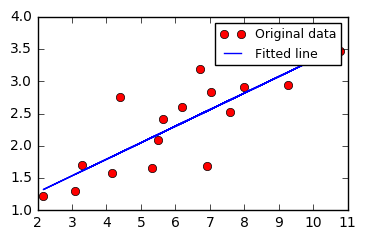

In [6]:
init = tf.initialize_all_variables()

with tf.Session() as sess:
    # initialize variables
    sess.run(init)

    for epoch in range(training_epochs):
        # train the model by running the optimizer (auto-update variables)
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})

        # show the information every (display_step) epoch
        log(epoch, display_step, sess, cost, train_X, train_Y, W, b)

    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    plot_graph(train_X, train_Y, sess, W, b)

### Example II : Binary Classfication (Logistic Regression)

Introduction to Logistic Regression : 
1. http://dasanlin888.pixnet.net/blog/post/34468457-logistic-regression%E4%BB%8B%E7%B4%B9---%E6%99%A8%E6%99%B0%E7%B5%B1%E8%A8%88%E6%9E%97%E6%98%9F%E5%B8%86%E9%A1%A7%E5%95%8F%E6%95%B4

2. https://www.csie.ntu.edu.tw/~htlin/course/mlfound16fall/doc/10_handout.pdf

Cost function:
<img src="./files/logistic_reg1.png" width=300>

Decision function:
<img src="./files/logistic_reg2.png" width=300>

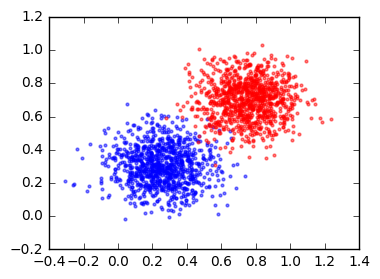

In [7]:
# Generate data

# Positive class
p_sample = 1000
x1_p = np.random.randn(p_sample, 1)*0.15 + 0.25
x2_p = np.random.randn(p_sample, 1)*0.12 + 0.3
X_p = np.concatenate((x1_p, x2_p), axis=1)
Y_p = np.ones((p_sample, 1))

# Negative class
n_sample = 1000
x1_n = np.random.randn(n_sample, 1)*0.15 + 0.75
x2_n = np.random.randn(n_sample, 1)*0.12 + 0.7
X_n = np.concatenate((x1_n, x2_n), axis=1)
Y_n = -np.ones((n_sample, 1))

# all data
X = np.concatenate((X_p, X_n))
Y = np.concatenate((Y_p, Y_n))

# visualize sample data
plt.figure(figsize=(4, 3))
plt.scatter(X_p[:, 0], X_p[:, 1], color='b', s=4, alpha=0.5)
plt.scatter(X_n[:, 0], X_n[:, 1], color='r', s=4, alpha=0.5)

In [8]:
# Parameters
learning_rate = 0.03
training_epochs = 50
batch_size = 20
display_step = 10

# tf Graph Input - dynamic shape
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

# Set model weights
W = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

# Construct logistic regression model
exp_a1 = tf.exp(tf.mul((tf.matmul(x, W) + b), -y)) + 1
pred = tf.nn.sigmoid(tf.add(tf.matmul(x, W), b))    # decision function

cost = tf.reduce_mean(tf.reduce_sum(tf.log(exp_a1), reduction_indices=1))    # cost function

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
optimizer = optimizer.minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

In [9]:
with tf.Session().as_default() as sess:
    # initialize variables
    sess.run(init)

    # training
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(X.shape[0] / batch_size)
        rand_ins = np.random.permutation(X.shape[0])

        for i in range(total_batch):
            # generate batch data in random order
            indexes = rand_ins[i*batch_size:(i + 1)*batch_size]
            batch_xs, batch_ys = X[indexes], Y[indexes]

            # fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})

            # compute average loss
            avg_cost += c / total_batch

        if (epoch + 1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

Epoch: 0010 cost= 0.397675650
Epoch: 0020 cost= 0.279481996
Epoch: 0030 cost= 0.220208746
Epoch: 0040 cost= 0.184778843
Epoch: 0050 cost= 0.161142172


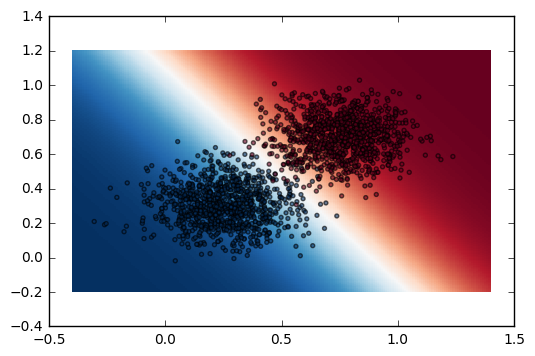

In [10]:
# visualize the decision boundary
with sess.as_default():
    xx1, xx2 = np.meshgrid(np.linspace(-0.4, 1.4, 200), np.linspace(-0.2, 1.2, 200))
    xx = np.c_[xx1.ravel(), xx2.ravel()]

    # get predictions over the grid
    pred_xx = sess.run(pred, feed_dict={x: xx})

    # plot the decision boundary
    plt.pcolormesh(xx1, xx2, pred_xx.reshape(xx1.shape), cmap=plt.cm.RdBu)

    # plot the original training data
    plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap=plt.cm.RdBu, s=8, alpha=0.6)

### Using Multicores

In [11]:
from datetime import datetime

A = np.random.rand(500, 1000).astype('float32')
B = np.random.rand(1000, 500).astype('float32')

# CPU
with tf.device('/cpu:0'):
    a = tf.constant(A)
    b = tf.constant(B)
    c = tf.matmul(a, b)

start = datetime.now()
with tf.Session() as sess:
    sess.run(c)
    end = datetime.now()
    print('Using cpu: %s' % str(end - start))

# # GPU - if you have
# with tf.device('/gpu:0'):
#     a = tf.constant(A)
#     b = tf.constant(B)
#     c = tf.matmul(a, b)

# start = datetime.now()
# with tf.Session() as sess:
#     sess.run(c)
#     end = datetime.now()
#     print('Using gpu: %s' % str(end - start))

Using cpu: 0:00:00.125288
